# Exploring Grib Files

Import libraries

In [11]:
import matplotlib.pyplot as plt
import pygrib
import numpy as np
plt.interactive(True)

Import Basemap with workaround to set the `PROJ_LIB` environment variable

In [6]:
import os
try:
    os.environ['PROJ_LIB'] = '/home/robwall/anaconda2/envs/metocean_data_py3/share/proj'
    from mpl_toolkits.basemap import Basemap
except:
    os.environ['PROJ_LIB'] = '/home/robwall/anaconda3/envs/py27/share/proj'
    from mpl_toolkits.basemap import Basemap


## Load data

In [7]:
grib_files = [os.path.join("data", f) for f in os.listdir("data")]

### With PyGrib

In [8]:
grbs = pygrib.open(grib_files[0])

In [14]:
grbs.select()[4]

5:Significant height of combined wind waves and swell:m (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 201812060000

In [16]:
grb = grbs.select(name="Significant height of combined wind waves and swell")[0]
data = grb.values
lat, lon = grb.latlons()

### Plot with Basemap

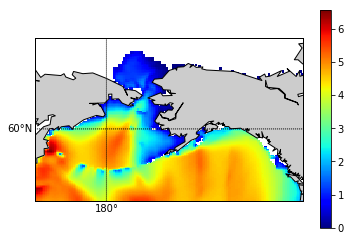

In [18]:
m=Basemap(projection="mill", lat_ts=10, llcrnrlon=lon.min(),
         urcrnrlon=lon.max(), llcrnrlat=lat.min(), urcrnrlat=lat.max(),
         resolution='c')
x, y = m(lon, lat)
cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

plt.colorbar(cs,orientation='vertical')
plt.show()

### Plot all WW3 Files

In [120]:
def plot_grb_waves(grb_f, ax):
    grbs = pygrib.open(grb_f)
    grb = grbs.select(name="Significant height of combined wind waves and swell")[0]
    data = grb.values
    lat, lon = grb.latlons()
    
    m=Basemap(projection="mill", lat_ts=10, llcrnrlon=lon.min(),
         urcrnrlon=lon.max(), llcrnrlat=lat.min(), urcrnrlat=lat.max(),
         resolution='c', ax=ax)
    x, y = m(lon, lat)
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
    m.drawcoastlines()
    m.fillcontinents()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

    ax.set_title(grb_f)

In [121]:
grib_files

['data/akw.t00z.grib.grib2.grb',
 'data/enp.t00z.grib.grib2.grb',
 'data/wna.t00z.grib.grib2.grb',
 'data/multi_1.enp.t00z.grib2.grb',
 'data/multi_1.nww3.t00z.grib2.grb',
 'data/multi_1.akw.t00z.grib2.grb',
 'data/nww3.t00z.grib.grib2.grb',
 'data/multi_1.wna.t00z.grib2.grb']

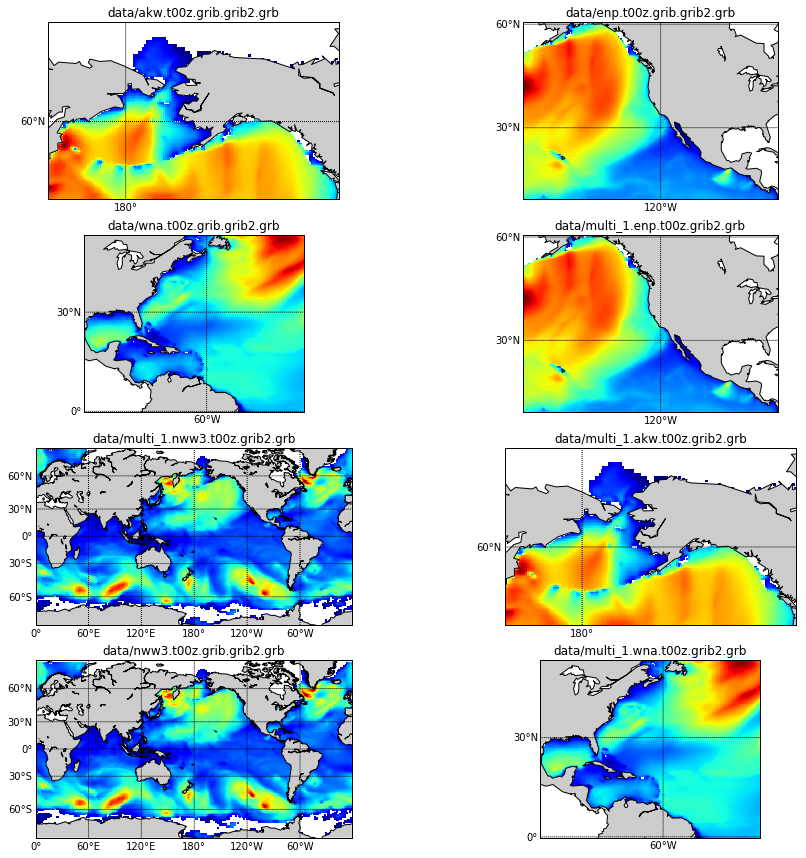

In [122]:
fig, ax = plt.subplots(nrows=4, ncols=2,
                      figsize=(15,15))
i = 0

for n, f in enumerate(grib_files):
    j = n % 2
    
    plot_grb_waves(f, ax[i,j])
    
    if n % 2 == 1:
        i += 1
    
plt.show()    

Only `nww3` outputs cover Aus

In [35]:
global_f = grib_files[-2]
grbs = pygrib.open(global_f)
grb = grbs.select(name="Significant height of combined wind waves and swell")[0]
data = grb.values
lat, lon = grb.latlons()

In [59]:
lat.min(), lat.max()

(-78.0, 78.0)

In [60]:
lon.min(), lon.max()

(0.0, 358.75)

In [61]:
lat.shape, lon.shape, data.shape

((157, 288), (157, 288), (157, 288))

In [55]:
coord_filter = (lon >= 100) & \
    (lon <= 130) & \
    (lat >= -50) & \
    (lat <= 0)


In [70]:
lat_filter = np.where(coord_filter, lat, np.nan)

In [78]:
lat_filter.min()

nan

In [94]:
def plot_aus_waves(grb_f=None, grbs=None):
    if grbs == None:
        grbs = pygrib.open(grb_f)
    grb = grbs.select(name="Significant height of combined wind waves and swell")[0]
    data = grb.values
    lat, lon = grb.latlons()
    
    fig, ax = plt.subplots(figsize=(10,10))
    
    m=Basemap(projection="mill", lat_ts=10, llcrnrlon=100,
         urcrnrlon=180, llcrnrlat=-50, urcrnrlat=0,
         resolution='c', ax=ax)
    x, y = m(lon, lat)
    cs = m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.jet)
    m.drawcoastlines()
    m.fillcontinents()
    m.drawmapboundary()
    m.drawparallels(np.arange(-90.,120.,30.),labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

    #plt.colorbar(cs,orientation='vertical')
    
    ax.scatter(x, y, alpha=0.8, s=1, color='k')
    
    plt.title(grb_f)
    plt.show()

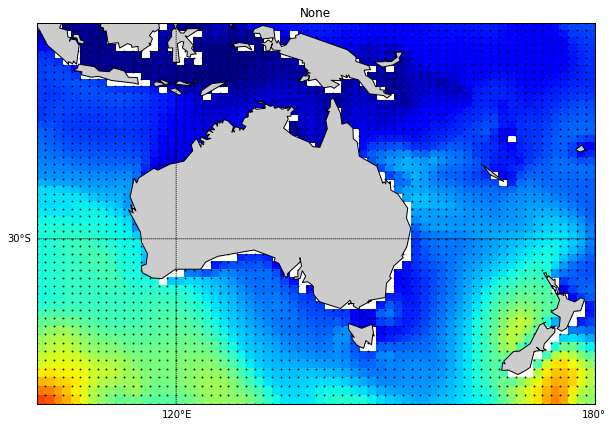

In [95]:
plot_aus_waves(grbs=grbs)

### Determine variables

In [125]:
variables = grbs.select()

In [161]:
[(i, v.name, v.shortName) for i, v in enumerate(variables[:12])]

[(0, u'Wind speed', u'ws'),
 (1, u'Wind direction', u'wdir'),
 (2, u'U component of wind', u'u'),
 (3, u'V component of wind', u'v'),
 (4, u'Significant height of combined wind waves and swell', u'swh'),
 (5, u'Mean period of wind waves', u'mpww'),
 (6, u'Primary wave mean period', u'perpw'),
 (7, u'Direction of wind waves', u'wvdir'),
 (8, u'Primary wave direction', u'dirpw'),
 (9, u'Significant height of wind waves', u'shww'),
 (10, u'Secondary wave mean period', u'persw'),
 (11, u'Secondary wave direction', u'dirsw')]

Matched variables available through ECMWF ERA5 reanalysis (some need to be confirmed)

In [162]:
variables = [
            '10m_u_component_of_wind','10m_v_component_of_wind','mean_direction_of_total_swell',
            'mean_direction_of_wind_waves','mean_period_of_total_swell','mean_period_of_wind_waves',
            'mean_wave_direction','mean_wave_direction_of_first_swell_partition','mean_wave_direction_of_second_swell_partition',
            'mean_wave_period','mean_wave_period_based_on_first_moment_for_swell','mean_wave_period_of_first_swell_partition',
            'mean_wave_period_of_second_swell_partition','significant_height_of_combined_wind_waves_and_swell','significant_height_of_wind_waves'
        ]